In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('비만율_20240123150144.csv')
population = pd.read_csv('주민등록인구_20240123172020.csv')
food_s = pd.read_csv('서울시 일반음식점 인허가 정보.csv', encoding='cp949')
g = pd.read_csv('서울시 체력단련장업 인허가 정보.csv', encoding='cp949')
med = pd.read_csv('1인당+보건예산액_20240123171157.csv')
p = pd.read_csv('공원_20240123150859.csv')
prod = pd.read_csv('자치구별+1인당+지역내총생산+및+수준지수(2015년+기준)_20240123172432.csv')
bic = pd.read_csv('자전거도로+현황(2013년+이후)_20240126005943.csv')
bic1 = pd.read_csv('자전거도로+현황(2002~2012)_20240126010326.csv')


data = data.set_index('구분별(3)')

C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\3642822735.py:3: DtypeWarning: Columns (2,8,13,14,25,28,29,30,36,39,41,42,46,48,56,57,59,60,61,62,63,66,71,80) have mixed types. Specify dtype option on import or set low_memory=False.
  food_s = pd.read_csv('서울시 일반음식점 인허가 정보.csv', encoding='cp949')


In [3]:
name_list = ['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']

In [4]:
data = data.loc['종로구':'강동구',:]
data = data.drop(['구분별(1)','구분별(2)'], axis=1)

In [5]:
def make_target(a,b):
    
    target_list=[]

    for i in name_list:
        l = list(data.loc[i,:][a::b])
        target_list.append(l)

    target_list = np.array(target_list)
    target_list = np.concatenate(target_list).tolist()
    
    print(target_list)
    
    index_list = []
    index_list2 = []

    for i in range(0,25):
        index_list = []
        for j in range(2011,2022):

            index_list.append(name_list[i] + str(j))

        index_list2.append(index_list)


    index_list2 = np.array(index_list2)
    index_list2 = np.concatenate(index_list2).tolist()
    print(index_list2)
    
    target = pd.DataFrame(target_list)
    target.index = index_list2
    
    return target



In [6]:
target = make_target(0,3)

['22.0', '22.7', '24.0', '24.6', '25.0', '26.0', '25.8', '32.4', '34.2', '28.7', '25.4', '20.1', '20.9', '23.9', '25.6', '23.6', '25.7', '24.5', '27.6', '29.1', '26.2', '27.2', '22.6', '27.7', '22.5', '25.0', '24.7', '24.0', '25.8', '24.7', '26.5', '25.5', '26.2', '22.1', '21.7', '24.2', '24.3', '24.1', '26.1', '26.9', '29.5', '32.4', '29.6', '26.3', '20.6', '21.3', '20.8', '21.6', '24.5', '25.9', '24.7', '30.5', '28.9', '25.1', '27.6', '26.3', '27.4', '26.1', '26.7', '25.4', '28.0', '27.3', '30.3', '36.1', '31.3', '31.3', '26.5', '24.9', '24.4', '28.4', '25.8', '28.3', '30.3', '34.2', '36.2', '31.9', '31.0', '23.6', '26.6', '25.0', '24.5', '25.4', '28.6', '23.4', '32.3', '32.6', '28.4', '28.2', '25.3', '23.8', '24.1', '24.8', '29.5', '29.3', '29.6', '28.5', '30.3', '31.2', '32.3', '24.7', '25.1', '27.4', '23.7', '25.9', '27.8', '28.5', '27.9', '36.6', '34.2', '33.6', '21.0', '25.3', '23.3', '25.6', '24.2', '26.9', '27.4', '30.2', '34.7', '31.5', '28.9', '23.5', '21.4', '23.1', '23.2',

In [7]:
target

,0
종로구2011,22.0
종로구2012,22.7
종로구2013,24.0
종로구2014,24.6
종로구2015,25.0
...,...
강동구2017,24.1
강동구2018,30.1
강동구2019,31.3
강동구2020,31.8


In [10]:
population.set_index('동별(2)')

,동별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,...,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
동별(2),,,,,,,,,,,,,,,,,,,,,
동별(2),동별(1),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),...,계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
동별(2),동별(1),소계,소계,남자,여자,소계,남자,여자,소계,남자,...,남자,여자,소계,남자,여자,소계,남자,여자,소계,소계
소계,합계,4192752,10528774,5208492,5320282,10249679,5073899,5175780,279095,134593,...,4721977,5014050,9509458,4618040,4891418,226569,103937,122632,2.15,1605416
종로구,합계,76688,177419,88107,89312,168382,83931,84451,9037,4176,...,74186,79603,144683,70183,74500,9106,4003,5103,1.97,27818
중구,합계,61475,141567,71137,70430,133193,67065,66128,8374,4072,...,64083,67704,122499,59630,62869,9288,4453,4835,1.93,24392
용산구,합계,112617,259288,126735,132553,246501,120183,126318,12787,6552,...,115085,122200,222953,107210,115743,14332,7875,6457,2.01,39070
성동구,합계,126148,308767,154511,154256,300711,150655,150056,8056,3856,...,142259,150413,285990,139380,146610,6682,2879,3803,2.13,46380
광진구,합계,158472,386673,190867,195806,371936,184103,187833,14737,6764,...,169317,183310,339996,164058,175938,12631,5259,7372,2.02,51723
동대문구,합계,157823,378534,189538,188996,365486,183925,181561,13048,5613,...,172162,179844,337400,166646,170754,14606,5516,9090,2.01,62211


In [8]:
##2011.4~2011.10 / 2012.4~2012.10 ...


for i in range(2011,2022):
    population = population.drop([str(i)], axis=1)
    population = population.drop([str(i)+'.4'], axis= 1)
    population = population.drop([str(i)+'.5'], axis= 1)
    population = population.drop([str(i)+'.6'], axis= 1)
    population = population.drop([str(i)+'.7'], axis= 1)
    population = population.drop([str(i)+'.8'], axis= 1)
    population = population.drop([str(i)+'.9'], axis= 1)
    population = population.drop([str(i)+'.10'], axis= 1)
    
population = population.drop([0,1,2])
population = population.set_index('동별(2)')


In [18]:
target_list=[]
##전체:1 / 남자:2 / 여자:3 / 노인: 4

for i in name_list:
        l = list(population.loc[i,:][4::4])
        target_list.append(l)

target_list = np.array(target_list)
target_list = np.concatenate(target_list).tolist()

print(target_list)

['22939', '23868', '23997', '24537', '24892', '25091', '26182', '26742', '27519', '28507', '27818', '18099', '18875', '19346', '19960', '20302', '20606', '21384', '22005', '23275', '24495', '24392', '31837', '33027', '34017', '34896', '35715', '35915', '36882', '37640', '38791', '40247', '39070', '32767', '34180', '35421', '36684', '38164', '39262', '41273', '42767', '43947', '45603', '46380', '33613', '35759', '37623', '38974', '40368', '41441', '43953', '45619', '47902', '50560', '51723', '44368', '46795', '49097', '50915', '52490', '53460', '55718', '57165', '59350', '61796', '62211', '43745', '46476', '48998', '51995', '54095', '55914', '59262', '61830', '65164', '69447', '71682', '55213', '58142', '60499', '62066', '63281', '64015', '66251', '67782', '70850', '73770', '74709', '43507', '46222', '48547', '50841', '52598', '54053', '56530', '58196', '60577', '63422', '64333', '39810', '42267', '44469', '46471', '48590', '50510', '53488', '55964', '58714', '62059', '64160', '58642', 

In [19]:
target['노인 인구수'] = target_list

In [20]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수
종로구2011,22.0,177419,88107,89312,22939
종로구2012,22.7,173148,85997,87151,23868
종로구2013,24.0,167867,83211,84656,23997
종로구2014,24.6,165344,81439,83905,24537
종로구2015,25.0,163822,80531,83291,24892
...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161
강동구2018,30.1,431920,213853,218067,58770
강동구2019,31.3,440390,217338,223052,63452
강동구2020,31.8,463998,228044,235954,70019


In [21]:
r = food_s

In [22]:
r

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,3010000.0,3010000-101-2023-00540,2023-11-03,NaN,1.0,영업/정상,1.0,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3220000.0,3220000-101-2023-00459,2023-03-31,NaN,1.0,영업/정상,1.0,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3230000.0,3230000-101-2023-00343,2023-05-12,NaN,1.0,영업/정상,1.0,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3230000.0,3230000-101-2023-00220,2023-03-31,NaN,1.0,영업/정상,1.0,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3230000.0,3230000-101-2023-00222,2023-03-31,NaN,1.0,영업/정상,1.0,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500567,3020000.0,3020000-101-1988-00925,19880704,NaN,1.0,영업/정상,1.0,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500568,3140000.0,3140000-101-1983-00740,19830309,NaN,3.0,폐업,2.0,폐업,20220513,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500569,3120000.0,3120000-101-2001-05311,20010915,NaN,3.0,폐업,2.0,폐업,20220513,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500570,3150000.0,3150000-101-2020-00383,20200706,NaN,3.0,폐업,2.0,폐업,20220514,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
r['인허가일자'] = r['인허가일자'].apply(lambda x: str(x).replace('-',''))
r['폐업일자'] = r['폐업일자'].fillna('99999999')
r['폐업일자'] = r['폐업일자'].apply(lambda x: str(x).replace('-',''))
r['폐업일자'] = r['폐업일자'].apply(lambda x: float(x))
r = r.dropna(subset = ['도로명주소'], axis=0)
r['인허가일자'] = r['인허가일자'].apply(lambda x: int(x))

C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\1803015499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['인허가일자'] = r['인허가일자'].apply(lambda x: int(x))


In [24]:

numbers_of_re = []

#2011년부터 2021년 까지의 각 년도별 영업 하고 있는 음식점들만 추출

for j in name_list:
    print(j)
    restaurants = r[r['도로명주소'].str.contains('서울특별시 '+j)]
    
    for i in range(2011, 2022):
        numbers = len(restaurants[(restaurants['인허가일자'] < int(i*10000)) & 
                                  ((restaurants['상세영업상태코드'] < 2) | (restaurants['폐업일자'] >= int((i+1)*10000)))])
        
        numbers_of_re.append(numbers)
        
print(numbers_of_re)

종로구
중구
용산구
성동구
광진구
동대문구
중랑구
성북구
강북구
도봉구
노원구
은평구
서대문구
마포구
양천구
강서구
구로구
금천구
영등포구
동작구
관악구
서초구
강남구
송파구
강동구
[5381, 5550, 5527, 5659, 5848, 6009, 6179, 6243, 6352, 6376, 6328, 4526, 4714, 4867, 4944, 5038, 5128, 5204, 5328, 5460, 5556, 5610, 2509, 2798, 3079, 3222, 3390, 3719, 3869, 4033, 4156, 4173, 4225, 2243, 2330, 2421, 2491, 2554, 2581, 2678, 2840, 2970, 3108, 3245, 3481, 3706, 3714, 3729, 3796, 3789, 3788, 3772, 3827, 3858, 3914, 3570, 3811, 3987, 4038, 3970, 3966, 3813, 3715, 3637, 3703, 3748, 3381, 3442, 3333, 3372, 3402, 3433, 3439, 3427, 3425, 3433, 3445, 3294, 3483, 3532, 3535, 3558, 3586, 3550, 3531, 3504, 3478, 3538, 3208, 3358, 3407, 3481, 3490, 3464, 3414, 3342, 3351, 3439, 3191, 2039, 2213, 2219, 2169, 2159, 2196, 2174, 2179, 2182, 2230, 2172, 2788, 3018, 3228, 3179, 3247, 3204, 3189, 3226, 3172, 3236, 3301, 3131, 3421, 3516, 3580, 3578, 3631, 3503, 3181, 3124, 3182, 3368, 3054, 3294, 3528, 3630, 3618, 3733, 3722, 3593, 3423, 3458, 3390, 4098, 4726, 5291, 5580, 6029, 6353, 671

In [25]:
target['음식점 수'] = numbers_of_re

In [26]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수
종로구2011,22.0,177419,88107,89312,22939,5381
종로구2012,22.7,173148,85997,87151,23868,5550
종로구2013,24.0,167867,83211,84656,23997,5527
종로구2014,24.6,165344,81439,83905,24537,5659
종로구2015,25.0,163822,80531,83291,24892,5848
...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543
강동구2018,30.1,431920,213853,218067,58770,3523
강동구2019,31.3,440390,217338,223052,63452,3520
강동구2020,31.8,463998,228044,235954,70019,3641


In [27]:
gym = g

gym['인허가일자'] =gym['인허가일자'].apply(lambda x: str(x).replace('-',''))
gym['인허가일자'] = gym['인허가일자'].apply(lambda x: int(x))
gym['폐업일자'] = gym['폐업일자'].fillna('99999999')
gym['폐업일자'] = gym['폐업일자'].apply(lambda x: str(x).replace('-',''))
gym['폐업일자'] = gym['폐업일자'].apply(lambda x: float(x))
gym['인허가취소일자'] =gym['인허가취소일자'].apply(lambda x: str(x).replace('-',''))
gym['인허가취소일자'] = gym['인허가취소일자'].apply(lambda x: float(x))
gym = gym.dropna(subset = ['도로명주소'], axis=0)

gym = gym.drop(2401) ##폐업일자 언제인지 모르는 행 제거

cancel = gym[gym['상세영업상태코드'] == 32]['인허가취소일자']
gym.loc[gym['상세영업상태코드'] == 32,'폐업일자'] = cancel ##인허가취소일자를 폐업일자와 동일하게 취급

##폐업일자 결측치인 것 제거
idx = gym.loc[(gym['상세영업상태코드'] == 3) & (gym['폐업일자'] == 99999999.0)].index
idx1 = gym.loc[(gym['상세영업상태코드'] == 35) & (gym['폐업일자'] == 99999999.0)].index
gym = gym.drop(idx)
gym = gym.drop(idx1)

In [37]:
gym[gym['상세영업상태코드'] == 2][['휴업종료일자', '휴업시작일자']]

##인덱스 4466번, 1027번만 2020년 구할때 제거하면 될듯(6개월 이상 휴업)

,휴업종료일자,휴업시작일자
912,2024-12-31,2023-05-24
1027,20200922,20200323
2717,20130901,20130508
2998,20230630,20221222
3370,20191231,20190726
4466,20201009,20191010
5940,20231113,20221114


In [28]:
numbers_of_gym = []

##각 구별로 분류
for j in name_list:
    print(j)
    gym_s = gym[gym['도로명주소'].str.contains('서울특별시 '+j)]
    
    #2011년부터 2021년 까지의 각 년도별 영업 하고 있는 헬스장들만 추출
    for i in range(2011, 2022):
        numbers = len(gym_s[(gym_s['인허가일자'] < int(i*10000)) & 
                                  ((gym_s['상세영업상태코드'] == 13) | (gym_s['폐업일자'] >= int((i+1)*10000)))])
            
        
        numbers_of_gym.append(numbers)
        
print(numbers_of_gym)

종로구
중구
용산구
성동구
광진구
동대문구
중랑구
성북구
강북구
도봉구
노원구
은평구
서대문구
마포구
양천구
강서구
구로구
금천구
영등포구
동작구
관악구
서초구
강남구
송파구
강동구
[46, 48, 50, 48, 43, 40, 48, 36, 42, 43, 50, 5, 9, 12, 17, 19, 23, 26, 29, 32, 42, 55, 27, 30, 33, 41, 46, 47, 42, 47, 50, 55, 66, 31, 33, 36, 39, 43, 46, 50, 54, 55, 56, 69, 72, 74, 77, 82, 84, 93, 94, 97, 102, 113, 121, 52, 52, 55, 55, 63, 65, 72, 70, 70, 61, 74, 42, 41, 42, 50, 46, 55, 55, 58, 56, 58, 63, 38, 40, 40, 45, 47, 50, 54, 55, 59, 61, 68, 37, 38, 38, 42, 46, 50, 51, 44, 43, 44, 43, 40, 37, 33, 36, 42, 45, 52, 50, 55, 57, 56, 43, 45, 45, 50, 58, 56, 59, 66, 68, 64, 75, 61, 63, 65, 67, 67, 77, 76, 81, 83, 79, 79, 34, 36, 35, 36, 35, 40, 47, 50, 54, 53, 60, 46, 50, 57, 68, 68, 79, 82, 91, 96, 108, 118, 64, 67, 71, 76, 81, 89, 98, 102, 87, 91, 99, 63, 62, 64, 66, 72, 88, 96, 104, 114, 124, 149, 48, 53, 59, 64, 68, 71, 78, 83, 83, 88, 76, 32, 32, 31, 35, 36, 40, 42, 43, 44, 49, 54, 71, 71, 73, 80, 85, 96, 101, 107, 107, 119, 132, 41, 43, 45, 43, 50, 53, 56, 56, 55, 59, 63, 69, 

In [29]:
gym.loc[1027] ##종로구, 2020년에서 하나 제거
gym.loc[4466] ##강남구, 2020년에서 하나 제거

##한 구당 11개, 즉 9번째 idx에서 하나 제거/23*11+10 = 251번째 idx에서 하나 제거

numbers_of_gym[9] = 42
numbers_of_gym[251] = 421

In [30]:
print(numbers_of_gym)

[46, 48, 50, 48, 43, 40, 48, 36, 42, 42, 50, 5, 9, 12, 17, 19, 23, 26, 29, 32, 42, 55, 27, 30, 33, 41, 46, 47, 42, 47, 50, 55, 66, 31, 33, 36, 39, 43, 46, 50, 54, 55, 56, 69, 72, 74, 77, 82, 84, 93, 94, 97, 102, 113, 121, 52, 52, 55, 55, 63, 65, 72, 70, 70, 61, 74, 42, 41, 42, 50, 46, 55, 55, 58, 56, 58, 63, 38, 40, 40, 45, 47, 50, 54, 55, 59, 61, 68, 37, 38, 38, 42, 46, 50, 51, 44, 43, 44, 43, 40, 37, 33, 36, 42, 45, 52, 50, 55, 57, 56, 43, 45, 45, 50, 58, 56, 59, 66, 68, 64, 75, 61, 63, 65, 67, 67, 77, 76, 81, 83, 79, 79, 34, 36, 35, 36, 35, 40, 47, 50, 54, 53, 60, 46, 50, 57, 68, 68, 79, 82, 91, 96, 108, 118, 64, 67, 71, 76, 81, 89, 98, 102, 87, 91, 99, 63, 62, 64, 66, 72, 88, 96, 104, 114, 124, 149, 48, 53, 59, 64, 68, 71, 78, 83, 83, 88, 76, 32, 32, 31, 35, 36, 40, 42, 43, 44, 49, 54, 71, 71, 73, 80, 85, 96, 101, 107, 107, 119, 132, 41, 43, 45, 43, 50, 53, 56, 56, 55, 59, 63, 69, 69, 76, 55, 57, 64, 66, 80, 82, 77, 100, 69, 74, 85, 94, 113, 127, 141, 149, 174, 190, 206, 157, 177, 

In [31]:
target['헬스장 수'] = numbers_of_gym

In [32]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수
종로구2011,22.0,177419,88107,89312,22939,5381,46
종로구2012,22.7,173148,85997,87151,23868,5550,48
종로구2013,24.0,167867,83211,84656,23997,5527,50
종로구2014,24.6,165344,81439,83905,24537,5659,48
종로구2015,25.0,163822,80531,83291,24892,5848,43
...,...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543,101
강동구2018,30.1,431920,213853,218067,58770,3523,99
강동구2019,31.3,440390,217338,223052,63452,3520,97
강동구2020,31.8,463998,228044,235954,70019,3641,99


In [33]:
medical = med
medical = medical.set_index('자치구별(1)')


In [34]:
money_list = []

for i in name_list:
    print(i)
    for j in range(2011,2022):
        money = float(medical.loc[medical.index == i, str(j)][0])
        print(money)
        
        money_list.append(money)
    

종로구
26.1
31.8
37.2
43.0
48.7
46.6
51.5
58.6
51.2
58.4
64.1
중구
42.7
48.6
61.2
57.5
64.3
62.1
70.9
79.7
59.1
69.9
83.9
용산구
22.1
26.7
28.9
31.1
37.8
38.5
42.8
45.1
31.2
40.5
51.4
성동구
22.3
25.9
32.4
36.2
43.6
39.9
47.3
46.9
46.1
43.6
55.7
광진구
22.3
20.5
27.2
34.3
37.9
34.2
41.5
39.5
32.4
37.5
41.4
동대문구
18.2
23.6
27.6
29.1
34.5
32.4
40.0
42.7
35.1
40.1
46.2
중랑구
14.7
20.3
24.2
24.2
31.3
32.1
39.4
41.8
37.0
40.2
50.6
성북구
21.2
23.5
25.6
27.6
36.3
37.9
42.5
51.1
35.6
36.6
39.4
강북구
23.3
28.6
31.0
33.8
42.5
43.1
48.3
52.8
47.9
45.1
48.5
도봉구
16.3
25.6
25.4
28.5
36.1
36.4
39.6
35.6
35.9
39.0
45.9
노원구
17.0
21.0
28.6
28.9
36.1
36.5
39.7
48.0
39.1
42.6
47.6
은평구
16.6
28.7
27.8
28.1
33.4
36.2
41.3
43.4
30.9
34.6
41.1
서대문구
20.7
32.2
30.2
30.7
36.2
36.0
42.4
45.9
47.9
43.8
68.9
마포구
17.2
23.8
30.3
28.1
36.0
33.7
43.3
44.8
38.8
40.9
47.3
양천구
12.0
22.0
20.0
31.5
33.6
30.8
33.1
33.5
30.0
35.4
40.0
강서구
15.5
20.9
22.3
23.0
30.3
31.3
37.2
36.9
37.2
38.3
41.2
구로구
22.8
25.5
29.6
33.7
39.3
42.7
48.0
49.9
46.7
38.6
4

C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\2965463671.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  money = float(medical.loc[medical.index == i, str(j)][0])


In [35]:
target['인당 보건예산액'] = money_list

In [36]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액
종로구2011,22.0,177419,88107,89312,22939,5381,46,26.1
종로구2012,22.7,173148,85997,87151,23868,5550,48,31.8
종로구2013,24.0,167867,83211,84656,23997,5527,50,37.2
종로구2014,24.6,165344,81439,83905,24537,5659,48,43.0
종로구2015,25.0,163822,80531,83291,24892,5848,43,48.7
...,...,...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543,101,43.5
강동구2018,30.1,431920,213853,218067,58770,3523,99,48.9
강동구2019,31.3,440390,217338,223052,63452,3520,97,36.9
강동구2020,31.8,463998,228044,235954,70019,3641,99,36.9


In [37]:
parks = p
parks = parks.set_index('자치구별(2)')


In [38]:
park_list = []

for i in name_list:
    print(i)
    for j in range(2011,2022):
        park = int(parks.loc[parks.index == i, str(j)][0])
        print(park)
        
        park_list.append(park)

종로구
102
116
114
114
114
108
110
108
106
105
104
중구
68
68
68
71
70
70
70
70
73
75
76
용산구
80
80
101
101
101
101
102
103
110
108
108
성동구
81
80
80
81
81
82
84
85
86
87
88
광진구
55
55
55
56
56
55
55
59
60
63
68
동대문구
105
106
102
99
99
97
96
95
95
96
92
중랑구
95
95
103
103
104
104
102
102
101
102
109
성북구
128
130
130
130
130
130
127
127
133
135
122
강북구
71
83
83
83
83
83
83
84
82
84
84
도봉구
74
74
75
80
80
79
79
79
79
80
80
노원구
146
167
178
178
178
181
181
181
181
188
190
은평구
130
135
140
137
136
136
133
133
130
139
136
서대문구
124
122
120
120
120
119
119
118
118
123
124
마포구
132
141
148
152
155
143
142
142
142
143
144
양천구
116
119
119
119
119
120
120
120
121
123
123
강서구
162
162
163
167
167
167
167
167
170
175
173
구로구
97
96
96
90
90
92
98
101
104
108
108
금천구
51
51
51
51
58
54
55
55
55
55
55
영등포구
122
122
123
120
122
128
126
125
108
109
108
동작구
74
78
80
82
82
83
83
82
78
86
86
관악구
108
108
110
111
111
110
110
110
110
113
134
서초구
130
131
131
148
147
147
151
165
177
181
179
강남구
134
137
137
138
154
158
155
155
15

C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\1572562180.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  park = int(parks.loc[parks.index == i, str(j)][0])


In [39]:
target['공원 수'] = park_list

In [40]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수
종로구2011,22.0,177419,88107,89312,22939,5381,46,26.1,102
종로구2012,22.7,173148,85997,87151,23868,5550,48,31.8,116
종로구2013,24.0,167867,83211,84656,23997,5527,50,37.2,114
종로구2014,24.6,165344,81439,83905,24537,5659,48,43.0,114
종로구2015,25.0,163822,80531,83291,24892,5848,43,48.7,114
...,...,...,...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543,101,43.5,124
강동구2018,30.1,431920,213853,218067,58770,3523,99,48.9,124
강동구2019,31.3,440390,217338,223052,63452,3520,97,36.9,124
강동구2020,31.8,463998,228044,235954,70019,3641,99,36.9,125


In [41]:
area_list = []

for i in name_list:
    print(i)
    for j in range(2011,2022):
        area = float(parks.loc[parks.index == i, str(j+0.2)][0])
        print(area)
        
        area_list.append(area)

종로구
10898.6
11643.9
11575.4
11575.4
11575.4
11567.4
11569.7
11555.8
11556.1
11402.6
11404.1
중구
3129.7
3129.8
3128.1
3134.0
3132.5
3132.0
3132.0
3132.0
3155.1
3163.8
3178.2
용산구
1352.7
1352.7
1796.0
1796.0
1796.9
1794.1
1794.1
1795.6
1779.6
1777.1
1775.5
성동구
2955.2
2955.0
3061.7
3061.7
3067.3
3095.0
3101.4
3102.1
3100.0
3074.0
3074.3
광진구
3395.6
3395.6
3395.6
3396.2
3396.2
3359.2
3359.2
3363.0
3363.5
3451.0
3459.8
동대문구
1237.1
1238.1
1234.5
1279.5
1281.1
1277.2
1275.6
1275.8
1275.1
1219.2
1216.0
중랑구
5242.9
5242.9
5230.7
5231.7
5233.0
5211.9
5206.5
5206.3
5205.3
4990.3
5233.0
성북구
8166.7
8391.2
8391.2
8391.2
8393.0
8393.0
8338.1
8342.4
8329.4
8507.3
8491.6
강북구
14338.8
14336.6
14336.6
14337.6
14337.6
14337.6
14337.6
14346.7
14342.3
14424.5
14383.6
도봉구
10505.1
10059.1
10059.2
10069.6
10069.6
10083.8
10083.6
10075.3
10075.0
10160.4
10160.4
노원구
14125.8
14142.4
14163.4
14163.0
14163.0
14168.9
14337.7
14337.7
14344.4
14741.8
14742.9
은평구
15855.6
14026.1
14031.2
14024.3
13999.6
13999.6
13997.9
13997

C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\3892491131.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  area = float(parks.loc[parks.index == i, str(j+0.2)][0])


In [42]:
target['공원 면적'] = area_list

In [43]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수,공원 면적
종로구2011,22.0,177419,88107,89312,22939,5381,46,26.1,102,10898.6
종로구2012,22.7,173148,85997,87151,23868,5550,48,31.8,116,11643.9
종로구2013,24.0,167867,83211,84656,23997,5527,50,37.2,114,11575.4
종로구2014,24.6,165344,81439,83905,24537,5659,48,43.0,114,11575.4
종로구2015,25.0,163822,80531,83291,24892,5848,43,48.7,114,11575.4
...,...,...,...,...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543,101,43.5,124,3384.6
강동구2018,30.1,431920,213853,218067,58770,3523,99,48.9,124,3370.0
강동구2019,31.3,440390,217338,223052,63452,3520,97,36.9,124,3369.8
강동구2020,31.8,463998,228044,235954,70019,3641,99,36.9,125,3362.4


In [44]:
produce = prod

##20xx.3 열 쓰면 될듯
produce = produce.set_index('자치구별(2)')

In [45]:
produce_list = []

for i in name_list:
    print(i)
    
    ##2011~2014년도의 데이터는 없으므로 일단 0으로 채우고, 나중에 제일 적은 값으로 채우기
    produce_list.append(0)
    produce_list.append(0)
    produce_list.append(0)
    produce_list.append(0)
    
    for j in range(2015,2022):
        pr = int(produce.loc[produce.index == i, str(j+0.3)][0])
        print(pr)
        
        produce_list.append(pr)

print(produce_list)
    

종로구
181807
188763
196232
204380
218704
222905
238599
중구
387717
412792
406119
422166
417483
433922
481395
용산구
43882
46434
52939
54775
56571
56901
58918
성동구
34653
36165
35634
38084
40100
42193
48682
광진구
15417
16619
16802
17482
18211
18124
18732
동대문구
17996
19858
20224
20244
21033
20969
22164
중랑구
9479
10233
10723
11305
12174
12354
12742
성북구
11762
12705
13319
13736
13894
14020
14608
강북구
8571
9289
9694
10286
10743
11112
11754
도봉구
8506
9193
9929
10135
10438
10971
11233
노원구
9903
10532
11343
11883
12551
12466
13331
은평구
8076
9053
9645
10219
10582
10999
11139
서대문구
24235
24620
25894
26183
27023
27148
28793
마포구
47012
50254
50721
52827
54027
55026
58606
양천구
13448
13822
14634
15449
16083
15886
16897
강서구
17802
19924
28823
30233
30176
29536
32709
구로구
26919
28168
30375
31963
32692
32022
34144
금천구
59434
63306
65565
69247
70750
69064
71770
영등포구
73982
76026
81069
87124
91575
98627
109100
동작구
13391
14620
15421
15982
16197
16827
17250
관악구
10734
10829
11167
11400
11663
12151
12792
서초구
72294
77393
81170
85327


C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\281358166.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pr = int(produce.loc[produce.index == i, str(j+0.3)][0])


In [46]:
for i in range(4,269,11):
    print(i)
    minimum = np.array(produce_list[i:i+7]).min()
    
    produce_list[i-4] = minimum
    produce_list[i-3] = minimum
    produce_list[i-2] = minimum
    produce_list[i-1] = minimum


## 4-11, 15-22, 26, 37 ... 268 - 275

4
15
26
37
48
59
70
81
92
103
114
125
136
147
158
169
180
191
202
213
224
235
246
257
268


In [316]:
produce_list

[181807,
 181807,
 181807,
 181807,
 181807,
 188763,
 196232,
 204380,
 218704,
 222905,
 238599,
 387717,
 387717,
 387717,
 387717,
 387717,
 412792,
 406119,
 422166,
 417483,
 433922,
 481395,
 43882,
 43882,
 43882,
 43882,
 43882,
 46434,
 52939,
 54775,
 56571,
 56901,
 58918,
 34653,
 34653,
 34653,
 34653,
 34653,
 36165,
 35634,
 38084,
 40100,
 42193,
 48682,
 15417,
 15417,
 15417,
 15417,
 15417,
 16619,
 16802,
 17482,
 18211,
 18124,
 18732,
 17996,
 17996,
 17996,
 17996,
 17996,
 19858,
 20224,
 20244,
 21033,
 20969,
 22164,
 9479,
 9479,
 9479,
 9479,
 9479,
 10233,
 10723,
 11305,
 12174,
 12354,
 12742,
 11762,
 11762,
 11762,
 11762,
 11762,
 12705,
 13319,
 13736,
 13894,
 14020,
 14608,
 8571,
 8571,
 8571,
 8571,
 8571,
 9289,
 9694,
 10286,
 10743,
 11112,
 11754,
 8506,
 8506,
 8506,
 8506,
 8506,
 9193,
 9929,
 10135,
 10438,
 10971,
 11233,
 9903,
 9903,
 9903,
 9903,
 9903,
 10532,
 11343,
 11883,
 12551,
 12466,
 13331,
 8076,
 8076,
 8076,
 8076,
 8076,

In [47]:
target['인당 총생산금액'] = produce_list

In [48]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수,공원 면적,인당 총생산금액
종로구2011,22.0,177419,88107,89312,22939,5381,46,26.1,102,10898.6,181807
종로구2012,22.7,173148,85997,87151,23868,5550,48,31.8,116,11643.9,181807
종로구2013,24.0,167867,83211,84656,23997,5527,50,37.2,114,11575.4,181807
종로구2014,24.6,165344,81439,83905,24537,5659,48,43.0,114,11575.4,181807
종로구2015,25.0,163822,80531,83291,24892,5848,43,48.7,114,11575.4,181807
...,...,...,...,...,...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543,101,43.5,124,3384.6,19003
강동구2018,30.1,431920,213853,218067,58770,3523,99,48.9,124,3370.0,21123
강동구2019,31.3,440390,217338,223052,63452,3520,97,36.9,124,3369.8,22807
강동구2020,31.8,463998,228044,235954,70019,3641,99,36.9,125,3362.4,21029


In [49]:
bicycle = bic
bicycle1 = bic1

bicycle1 = bicycle1.set_index('지역별(2)')
bicycle1 = bicycle1.loc[bicycle1['도로별(2)'] =='소계'] ##여의도공원은 영등포구, 월드컵공원은 마포구

bicycle1[['2011','2011.1','2012','2012.1']] = bicycle1[['2011','2011.1','2012','2012.1']].applymap(lambda x: x.replace('-','0'))
bicycle1[['2011','2011.1','2012','2012.1']] = bicycle1[['2011','2011.1','2012','2012.1']].applymap(lambda x: float(x))
bicycle1 = bicycle1.drop(['지역별(1)','도로별(1)','도로별(2)'], axis=1)


C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\1804705763.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bicycle1[['2011','2011.1','2012','2012.1']] = bicycle1[['2011','2011.1','2012','2012.1']].applymap(lambda x: x.replace('-','0'))
C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\1804705763.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bicycle1[['2011','2011.1','2012','2012.1']] = bicycle1[['2011','2011.1','2012','2012.1']].applymap(lambda x: float(x))


In [52]:
bicycle1

,2011,2011.1,2012,2012.1
지역별(2),,,,
소계,399.0,804.2,421.0,666.0
종로구,7.0,10.6,9.0,7.9
중구,1.0,2.4,1.0,2.4
용산구,9.0,10.8,14.0,11.3
성동구,6.0,14.1,11.0,11.6
광진구,25.0,39.0,25.0,28.4
동대문구,5.0,8.4,6.0,9.7
중랑구,4.0,2.0,5.0,3.0
성북구,6.0,10.3,6.0,9.8


In [50]:
bicycle1.loc['영등포구'] += bicycle1.loc['여의도공원']
bicycle1.loc['마포구'] += bicycle1.loc['월드컵공원']

bicycle1 = bicycle1.drop(['여의도공원','월드컵공원','한강둔치','한강교량','지천','소계'])

In [54]:
bicycle1

,2011,2011.1,2012,2012.1
지역별(2),,,,
종로구,7.0,10.6,9.0,7.9
중구,1.0,2.4,1.0,2.4
용산구,9.0,10.8,14.0,11.3
성동구,6.0,14.1,11.0,11.6
광진구,25.0,39.0,25.0,28.4
동대문구,5.0,8.4,6.0,9.7
중랑구,4.0,2.0,5.0,3.0
성북구,6.0,10.3,6.0,9.8
강북구,6.0,8.7,5.0,7.8


In [51]:
bicycle = bic

bicycle = bicycle.set_index('지역별(3)')
bicycle = bicycle.drop(['지역별(1)','지역별(2)'], axis=1)
bicycle = bicycle.drop(['지역별(3)','소계','교량','하천','공원'])
bicycles = pd.concat([bicycle1, bicycle], axis=1)

In [51]:
bicycles ##20xx는 노선 수, 20xx.1은 길이

,2011,2011.1,2012,2012.1,2013,2013.1,2013.2,2013.3,2013.4,2013.5,...,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9
종로구,7.0,10.6,9.0,7.9,9,8.0,-,-,5,5.7,...,43,32.1,1,4.2,13,10.9,13,6.9,16,10.1
중구,1.0,2.4,1.0,2.4,1,2.4,-,-,1,2.4,...,21,22.4,1,4.2,6,7.5,-,-,14,10.7
용산구,9.0,10.8,14.0,11.3,11,11.3,3,1.5,8,9.8,...,26,32.5,5,1.9,11,10.2,-,-,10,20.4
성동구,6.0,14.1,11.0,11.6,7,11.4,1,0.3,4,6.9,...,32,27.8,2,1.7,18,15.9,3,2.0,9,8.2
광진구,25.0,39.0,25.0,28.4,18,27.6,-,-,17,24.0,...,50,48.3,1,0.2,43,43.2,1,0.3,5,4.6
동대문구,5.0,8.4,6.0,9.7,7,9.8,-,-,6,8.4,...,33,37.7,5,2.8,12,7.5,-,-,16,27.4
중랑구,4.0,2.0,5.0,3.0,4,3.0,4,3.0,-,-,...,22,9.8,10,3.7,12,6.0,-,-,-,-
성북구,6.0,10.3,6.0,9.8,6,9.8,3,1.8,3,5.6,...,30,16.8,15,6.6,9,7.0,5,2.9,1,0.4
강북구,6.0,8.7,5.0,7.8,5,7.6,-,-,3,3.2,...,8,8.7,-,-,3,3.2,5,5.5,-,-
도봉구,4.0,16.3,5.0,8.2,3,8.2,1,0.7,2,7.5,...,8,12.9,2,1.4,6,11.5,-,-,-,-


In [52]:
lanes_list=[]

for i in name_list:
    print(i)
    
    for j in range(2011,2022):
        lanes = int(bicycles.loc[bicycles.index == i][str(j)][0])
        print(lanes)
        lanes_list.append(lanes)



종로구
7
9
9
9
18
17
22
22
24
38
42
중구
1
1
1
2
13
11
13
13
12
18
21
용산구
9
14
11
11
12
16
17
16
19
26
26
성동구
6
11
7
8
12
20
22
22
21
31
30
광진구
25
25
18
18
18
20
20
22
23
50
49
동대문구
5
6
7
8
9
16
16
22
21
30
33
중랑구
4
5
4
4
4
8
8
8
9
16
22
성북구
6
6
6
8
8
7
8
7
8
13
23
강북구
6
5
5
5
5
4
4
3
3
8
8
도봉구
4
5
3
4
4
5
4
4
4
8
8
노원구
17
24
20
20
24
25
25
25
25
40
44
은평구
5
4
14
13
12
11
17
17
18
30
31
서대문구
5
1
2
3
18
26
25
28
27
47
47
마포구
10
12
13
14
26
32
32
33
33
57
65
양천구
25
29
27
24
30
33
31
28
28
59
62
강서구
19
22
30
29
30
31
32
34
43
80
79
구로구
8
12
14
13
14
16
15
15
14
38
39
금천구
5
3
3
4
5
7
7
7
7
19
20
영등포구
28
35
32
31
31
42
42
43
47
82
91
동작구
10
9
10
11
12
13
13
14
15
17
17
관악구
14
8
5
6
13
16
15
15
15
19
19
서초구
26
17
21
19
19
20
21
23
28
44
46
강남구
13
20
19
20
21
26
26
27
26
65
78
송파구
48
50
42
49
52
51
50
50
51
186
186
강동구
22
31
25
28
29
30
33
33
33
66
93


C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\20755663.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lanes = int(bicycles.loc[bicycles.index == i][str(j)][0])


In [53]:
target['자전거도로 노선 수'] = lanes_list

In [54]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수,공원 면적,인당 총생산금액,자전거도로 노선 수
종로구2011,22.0,177419,88107,89312,22939,5381,46,26.1,102,10898.6,181807,7
종로구2012,22.7,173148,85997,87151,23868,5550,48,31.8,116,11643.9,181807,9
종로구2013,24.0,167867,83211,84656,23997,5527,50,37.2,114,11575.4,181807,9
종로구2014,24.6,165344,81439,83905,24537,5659,48,43.0,114,11575.4,181807,9
종로구2015,25.0,163822,80531,83291,24892,5848,43,48.7,114,11575.4,181807,18
...,...,...,...,...,...,...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543,101,43.5,124,3384.6,19003,33
강동구2018,30.1,431920,213853,218067,58770,3523,99,48.9,124,3370.0,21123,33
강동구2019,31.3,440390,217338,223052,63452,3520,97,36.9,124,3369.8,22807,33
강동구2020,31.8,463998,228044,235954,70019,3641,99,36.9,125,3362.4,21029,66


In [55]:
length_list=[]

for i in name_list:
    print(i)
    
    for j in range(2011,2022):
        length = float(bicycles.loc[bicycles.index == i][str(j+0.1)][0])
        print(length)
        length_list.append(length)

종로구
10.6
7.9
8.0
8.1
18.1
17.5
20.5
23.7
23.7
26.5
31.6
중구
2.4
2.4
2.4
2.4
13.9
13.7
15.3
15.4
15.4
15.3
22.4
용산구
10.8
11.3
11.3
11.2
11.5
22.7
22.7
22.1
22.7
33.0
33.0
성동구
14.1
11.6
11.4
11.4
14.1
20.5
20.5
20.6
19.9
27.2
27.2
광진구
39.0
28.4
27.6
26.8
31.1
30.9
31.1
29.8
29.8
46.8
47.7
동대문구
8.4
9.7
9.8
7.7
8.0
22.4
22.2
24.3
23.9
37.8
37.7
중랑구
2.0
3.0
3.0
3.0
3.0
5.9
6.0
6.1
6.6
10.0
9.8
성북구
10.3
9.8
9.8
10.1
10.1
10.1
10.1
8.0
7.7
9.8
14.5
강북구
8.7
7.8
7.6
9.3
9.3
8.9
7.0
7.0
7.0
8.7
8.7
도봉구
16.3
8.2
8.2
8.2
8.2
8.4
12.2
12.3
12.3
12.9
12.9
노원구
39.5
31.5
31.6
28.2
28.0
28.2
28.3
28.3
28.3
42.9
43.7
은평구
7.6
4.7
16.8
16.9
16.9
16.7
26.7
26.9
26.9
39.8
44.0
서대문구
5.9
0.5
1.1
1.6
9.1
17.8
18.3
19.4
19.4
31.1
31.2
마포구
27.700000000000003
24.299999999999997
18.4
18.4
30.1
34.4
31.9
33.4
34.6
65.7
69.4
양천구
33.3
30.4
33.7
33.5
31.9
37.1
38.2
40.0
41.0
55.5
55.6
강서구
39.8
38.9
32.7
26.2
26.2
27.2
25.6
27.9
41.7
76.4
68.3
구로구
6.2
8.3
10.1
10.0
10.9
10.8
10.8
10.9
10.5
26.5
26.6
금천구
6.8
6.7
6.7
7.1


C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\1380566812.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  length = float(bicycles.loc[bicycles.index == i][str(j+0.1)][0])


In [191]:
bicycles.loc[bicycles.index == '마포구']['2012.1'][0]

C:\Users\pth10\AppData\Local\Temp\ipykernel_11892\317626712.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bicycles.loc[bicycles.index == '마포구']['2012.1'][0]


24.299999999999997

In [56]:
len(length_list)

275

In [57]:
target['자전거도로 길이'] = length_list

In [58]:
target

,0,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수,공원 면적,인당 총생산금액,자전거도로 노선 수,자전거도로 길이
종로구2011,22.0,177419,88107,89312,22939,5381,46,26.1,102,10898.6,181807,7,10.6
종로구2012,22.7,173148,85997,87151,23868,5550,48,31.8,116,11643.9,181807,9,7.9
종로구2013,24.0,167867,83211,84656,23997,5527,50,37.2,114,11575.4,181807,9,8.0
종로구2014,24.6,165344,81439,83905,24537,5659,48,43.0,114,11575.4,181807,9,8.1
종로구2015,25.0,163822,80531,83291,24892,5848,43,48.7,114,11575.4,181807,18,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
강동구2017,24.1,440359,218699,221660,56161,3543,101,43.5,124,3384.6,19003,33,38.2
강동구2018,30.1,431920,213853,218067,58770,3523,99,48.9,124,3370.0,21123,33,40.8
강동구2019,31.3,440390,217338,223052,63452,3520,97,36.9,124,3369.8,22807,33,42.1
강동구2020,31.8,463998,228044,235954,70019,3641,99,36.9,125,3362.4,21029,66,72.0


In [59]:
s = pd.read_csv('스트레스+인지율_20240126233915.csv')

In [60]:
stress = s
stress = stress.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
stress = stress.set_index('구분별(2)')


In [61]:
stress_list=[]

for i in name_list:
    print(i)
    
    for j in range(2011,2022):
        stress1 = float(stress.loc[stress.index == i][str(j)][0])
        print(stress1)
        stress_list.append(stress1)
        


종로구
31.2
33.5
31.0
30.3
26.4
25.4
24.1
31.5
26.2
26.9
27.7
중구
26.6
26.0
28.9
31.6
29.4
28.6
24.8
26.2
22.0
28.0
26.3
용산구
29.0
31.3
25.9
26.4
26.4
28.7
20.8
19.4
14.8
21.8
23.3
성동구
31.2
29.4
27.4
29.1
28.4
28.4
29.1
30.3
31.2
30.2
28.3
광진구
29.1
31.1
31.2
26.3
30.9
30.4
28.2
28.7
25.5
28.6
26.2
동대문구
32.5
29.4
31.5
29.9
29.1
26.6
29.4
27.0
29.7
24.5
21.0
중랑구
28.0
31.4
31.0
33.8
32.0
31.1
30.1
30.8
25.0
32.9
28.5
성북구
35.4
30.0
28.8
31.4
32.2
30.3
28.8
28.3
28.1
31.7
28.7
강북구
34.0
28.4
30.3
30.8
31.9
29.7
29.6
29.5
24.5
32.4
27.8
도봉구
28.6
29.7
26.3
27.7
29.3
29.4
29.0
27.1
26.7
26.1
29.3
노원구
30.8
30.3
30.3
29.4
28.1
26.8
25.1
24.8
20.6
22.5
22.4
은평구
29.1
29.5
27.0
32.9
30.1
25.9
20.8
21.8
27.5
30.1
26.4
서대문구
33.2
34.5
26.2
26.3
31.2
25.4
24.9
25.0
28.0
20.2
26.6
마포구
32.2
31.0
31.0
32.0
33.0
27.6
23.9
15.9
29.6
28.4
27.8
양천구
29.6
30.8
26.0
29.2
29.1
29.4
29.4
28.4
26.1
28.2
27.6
강서구
32.5
27.3
29.4
28.4
28.6
28.4
28.7
31.4
29.1
29.9
28.1
구로구
32.4
27.2
30.8
29.1
30.6
28.2
24.0
23.7
24.7
25.8
2

C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\3158124241.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stress1 = float(stress.loc[stress.index == i][str(j)][0])


In [62]:
target['스트레스 인지율'] = stress_list

In [63]:
target = target.applymap(lambda x: float(x))
target['비만율'] = target[0]
target= target.drop(0,axis=1)

C:\Users\pth10\AppData\Local\Temp\ipykernel_19752\332186842.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(lambda x: float(x))


In [64]:
target

,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수,공원 면적,인당 총생산금액,자전거도로 노선 수,자전거도로 길이,스트레스 인지율,비만율
종로구2011,177419.0,88107.0,89312.0,22939.0,5381.0,46.0,26.1,102.0,10898.6,181807.0,7.0,10.6,31.2,22.0
종로구2012,173148.0,85997.0,87151.0,23868.0,5550.0,48.0,31.8,116.0,11643.9,181807.0,9.0,7.9,33.5,22.7
종로구2013,167867.0,83211.0,84656.0,23997.0,5527.0,50.0,37.2,114.0,11575.4,181807.0,9.0,8.0,31.0,24.0
종로구2014,165344.0,81439.0,83905.0,24537.0,5659.0,48.0,43.0,114.0,11575.4,181807.0,9.0,8.1,30.3,24.6
종로구2015,163822.0,80531.0,83291.0,24892.0,5848.0,43.0,48.7,114.0,11575.4,181807.0,18.0,18.1,26.4,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
강동구2017,440359.0,218699.0,221660.0,56161.0,3543.0,101.0,43.5,124.0,3384.6,19003.0,33.0,38.2,27.4,24.1
강동구2018,431920.0,213853.0,218067.0,58770.0,3523.0,99.0,48.9,124.0,3370.0,21123.0,33.0,40.8,23.2,30.1
강동구2019,440390.0,217338.0,223052.0,63452.0,3520.0,97.0,36.9,124.0,3369.8,22807.0,33.0,42.1,21.6,31.3
강동구2020,463998.0,228044.0,235954.0,70019.0,3641.0,99.0,36.9,125.0,3362.4,21029.0,66.0,72.0,26.3,31.8


In [66]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\HARNGTON.TTF',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\BRLNSR.TTF',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\LeelawUI.ttf',
 'C:\\Windows\\Fonts\\ntailu.ttf',
 'C:\\Windows\\Fonts\\AGENCYB.TTF',
 'C:\\Windows\\Fonts\\PER_____.TTF',
 'C:\\Windows\\Fonts\\IMPRISHA.TTF',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\Windows\\Fonts\\KUNSTLER.TTF',
 'C:\\Windows\\Fonts\\comic.ttf',
 'C:\\Windows\\Fonts\\CASTELAR.TTF',
 'C:\\Windows\\Fonts\\arialbi.ttf',
 'C:\\Windows\\Fonts\\verdana.ttf',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\FRAMDCN.TTF',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\BOOKOSI.TTF',
 'C:\\Windows\\Fonts\\courbd.ttf',
 'C:\\Windows\\Fonts\\BOD_BLAR.TTF',
 'C:\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Windows\\Fonts\\impact.ttf',
 'C:\\Windows\\Fonts\\ARIALNI.TTF',
 'C:\\Windows\\Fonts\\TCCEB.TTF',
 'C:\\Windows\\Fonts\\FRABK.

In [71]:
#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\MATURASC.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [72]:
plt.rc('font', family='Malgun Gothic')

In [68]:
diabetes = target['비만율']
diabetes[264:275]

강동구2011    23.7
강동구2012    23.8
강동구2013    22.7
강동구2014    25.1
강동구2015    24.0
강동구2016    30.9
강동구2017    24.1
강동구2018    30.1
강동구2019    31.3
강동구2020    31.8
강동구2021    27.1
Name: 비만율, dtype: float64

In [69]:
##자치구별 비만율 평균 계산 0~11 / 11~22 / 22~33 / 

mean_list = []

for i in range(0,269,11):
    mean_diabetes = diabetes[i:i+11].mean()
    mean_list.append(mean_diabetes)
    
len(mean_list)
print(mean_list)

[26.436363636363634, 24.94545454545454, 25.018181818181816, 26.10909090909091, 24.681818181818183, 28.745454545454546, 29.263636363636362, 27.14545454545454, 28.063636363636366, 28.672727272727276, 27.181818181818176, 26.845454545454547, 26.818181818181817, 24.30909090909091, 26.809090909090912, 26.400000000000002, 27.8, 28.727272727272723, 25.881818181818186, 25.4, 26.663636363636364, 22.618181818181817, 21.636363636363637, 23.836363636363636, 26.781818181818185]


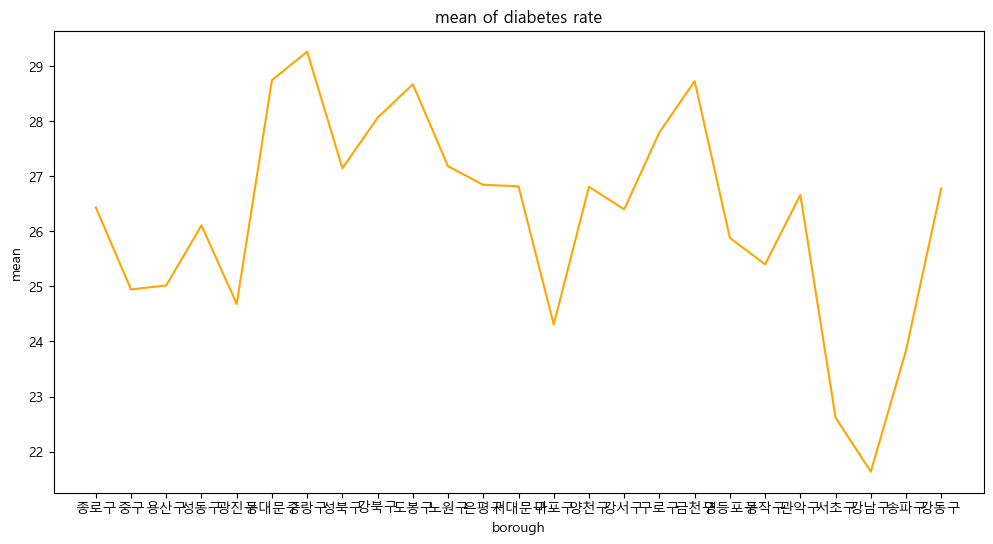

In [73]:
##자치구별 비만율 평균 그래프

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(name_list, mean_list, linestyle = '-', color='orange')

plt.title('mean of diabetes rate')
plt.xlabel('borough')
plt.ylabel('mean')

plt.show()


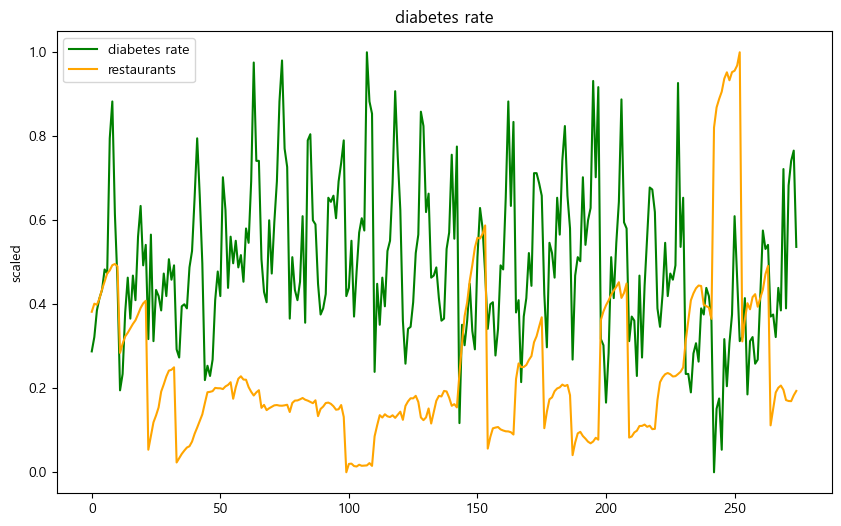

In [80]:


import matplotlib.pyplot as plt

rate = np.array(target_norm['비만율'])
production = np.array(target_norm['음식점 수'])


plt.figure(figsize=(10,6))

plt.plot(target_norm.index, rate, label = 'diabetes rate', linestyle='-', color='green')
plt.plot(target_norm.index, production, label = 'restaurants', linestyle='-', color='orange')

plt.title('diabetes rate')

plt.ylabel('scaled')

plt.legend()
plt.show()

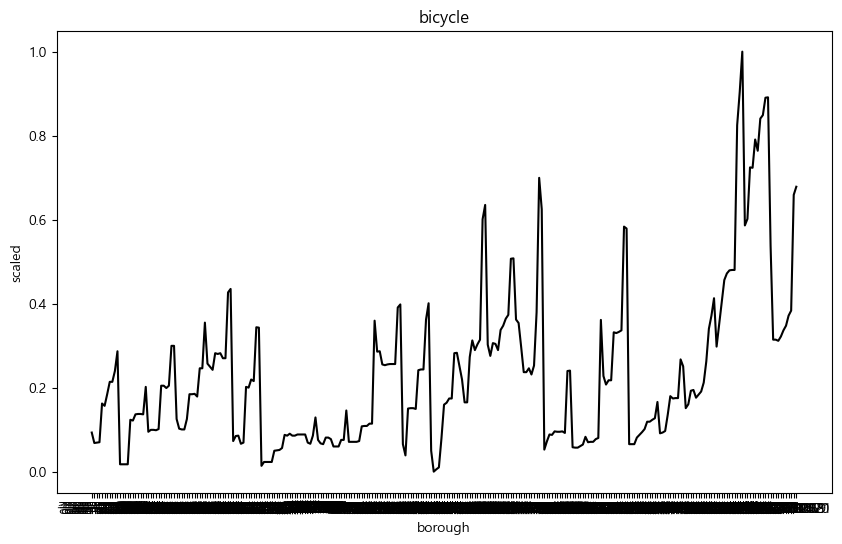

In [157]:
import matplotlib.pyplot as plt

jongro_bic = np.array(target_norm['자전거도로 길이'])


plt.figure(figsize=(10,6))

plt.plot(target.index, jongro_bic, linestyle='-', color='black')

plt.title('bicycle')
plt.xlabel('borough')
plt.ylabel('scaled')

plt.show()

In [74]:
##정규화 진행

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# MinMax 스케일링
scaler = MinMaxScaler()
target_norm = pd.DataFrame(scaler.fit_transform(target), columns = target.columns)


In [136]:
target['인당 총생산금액'].idxmax()

'중구2021'

In [90]:
target_norm['인당 총생산금액'].idxmax()

21

In [123]:
target_norm.describe()

,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수,공원 면적,인당 총생산금액,자전거도로 노선 수,자전거도로 길이,스트레스 인지율,비만율
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,0.493508,0.495037,0.437719,0.437719,0.245870,0.171582,0.334687,0.445703,0.354450,0.099467,0.116698,0.229299,0.598439,0.496177
std,0.228227,0.226250,0.199579,0.199579,0.190232,0.135987,0.159374,0.242792,0.301577,0.179201,0.117736,0.189154,0.146363,0.182739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.345625,0.341509,0.319272,0.319272,0.131603,0.098558,0.229485,0.233813,0.127756,0.009819,0.037838,0.087558,0.517699,0.370732
50%,0.502960,0.507677,0.433448,0.433448,0.183169,0.137019,0.333797,0.424460,0.226586,0.031123,0.091892,0.184332,0.615044,0.473171
75%,0.642384,0.647321,0.563248,0.563248,0.350217,0.191106,0.424200,0.604317,0.599132,0.102806,0.151351,0.302765,0.690265,0.609756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [374]:
##상관관계 확인

target_norm.corr()

,전체 인구수,남자 인구수,여자 인구수,노인 인구수,음식점 수,헬스장 수,인당 보건예산액,공원 수,공원 면적,인당 총생산금액,자전거도로 노선 수,자전거도로 길이,비만율,스트레스 인지율
전체 인구수,1.000000,0.998368,0.998542,0.784608,0.185509,0.499085,-0.499431,0.688356,0.170049,-0.524297,0.385410,0.550152,-0.152313,0.075401
남자 인구수,0.998368,1.000000,0.993830,0.772945,0.162004,0.477695,-0.516633,0.665779,0.155493,-0.531899,0.369723,0.531866,-0.151480,0.085278
여자 인구수,0.998542,0.993830,1.000000,0.793277,0.207170,0.517805,-0.481674,0.707630,0.183295,-0.515538,0.399081,0.565784,-0.152643,0.065839
노인 인구수,0.784608,0.772945,0.793277,1.000000,0.070450,0.436081,-0.104782,0.622792,0.280891,-0.522474,0.456524,0.465559,0.305968,-0.151688
음식점 수,0.185509,0.162004,0.207170,0.070450,1.000000,0.755293,0.157065,0.433440,0.036932,0.446029,0.358083,0.492727,-0.298791,0.014547
헬스장 수,0.499085,0.477695,0.517805,0.436081,0.755293,1.000000,0.008904,0.482038,0.037525,0.028047,0.490255,0.659027,-0.127379,-0.005841
인당 보건예산액,-0.499431,-0.516633,-0.481674,-0.104782,0.157065,0.008904,1.000000,-0.150874,-0.033202,0.565697,0.144796,0.002284,0.416568,-0.329967
공원 수,0.688356,0.665779,0.707630,0.622792,0.433440,0.482038,-0.150874,1.000000,0.337185,-0.158983,0.452702,0.536251,-0.131879,-0.076992
공원 면적,0.170049,0.155493,0.183295,0.280891,0.036932,0.037525,-0.033202,0.337185,1.000000,-0.091380,-0.143656,-0.121603,-0.002332,0.053494
인당 총생산금액,-0.524297,-0.531899,-0.515538,-0.522474,0.446029,0.028047,0.565697,-0.158983,-0.091380,1.000000,-0.010876,-0.023463,-0.135460,-0.064686


In [81]:
y = target_norm['비만율']

In [82]:
y

0      0.287805
1      0.321951
2      0.385366
3      0.414634
4      0.434146
         ...   
270    0.390244
271    0.682927
272    0.741463
273    0.765854
274    0.536585
Name: 비만율, Length: 275, dtype: float64

In [83]:
X = target_norm.drop('비만율',axis=1)

In [112]:
X.columns

Index(['전체 인구수', '남자 인구수', '여자 인구수', '노인 인구수', '음식점 수', '헬스장 수', '인당 보건예산액',
       '공원 수', '공원 면적', '인당 총생산금액', '자전거도로 노선 수', '자전거도로 길이', '스트레스 인지율'],
      dtype='object')

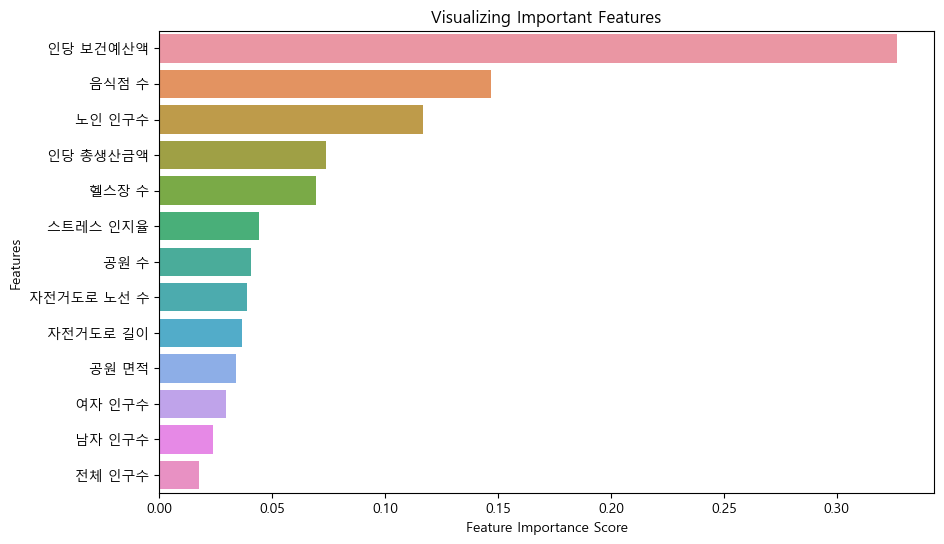

In [147]:
random.fit(X, y)

feature_imp = pd.Series(random.feature_importances_, index=X.columns).sort_values(ascending=False)

# 특성 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
plt.figure(figsize=(10,6))

sns.barplot(x=feature_imp, y=feature_imp.index)
 

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [139]:
##5번 교차검증 후 변수 중요도

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


tree = DecisionTreeRegressor()
random = RandomForestRegressor()

scores = cross_val_score(
    estimator = random,
    X=X, y=y,
    cv=5,
    scoring = 'neg_mean_squared_error'
)

print("MSE 평균: {}".format(-1*(scores.mean())))

MSE 평균: 0.03150561528960035


In [140]:
from sklearn.svm import SVR

#서포트 벡터 머신

svr = SVR(kernel = 'linear')

scores = cross_val_score(
    estimator = svr,
    X=X, y=y,
    cv=5,
    scoring = 'neg_mean_squared_error'
)

print("MSE 평균: {}".format(-1*(scores.mean())))

MSE 평균: 0.01829159795797153


In [142]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

scores = cross_val_score(
    estimator = linear,
    X=X, y=y,
    cv=5,
    scoring = 'neg_mean_squared_error'
)

print("MSE 평균: {}".format(-1*(scores.mean())))

MSE 평균: 0.023972869336077573


In [144]:
import xgboost

xgb = xgboost.XGBRegressor()

scores = cross_val_score(
    estimator = xgb,
    X=X, y=y,
    cv=5,
    scoring = 'neg_mean_squared_error',
    n_jobs=multiprocessing.cpu_count()
)

print("MSE 평균: {}".format(-1*(scores.mean())))

MSE 평균: 0.03624683201406629
